In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
pd.set_option('display.max_columns',None)

In [257]:
df=pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [258]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New property,1081.0,NaN,650.0,0,0,0,0,0,0,8,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New property,NaN,NaN,1103.0,1,1,0,0,0,0,38,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New property,NaN,1000.0,585.0,0,0,0,0,0,0,49,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Moderately old,1995.0,1615.0,1476.0,0,1,0,0,1,1,174,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Moderately old,632.0,NaN,532.0,0,0,1,0,0,0,159,266.000000


In [259]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

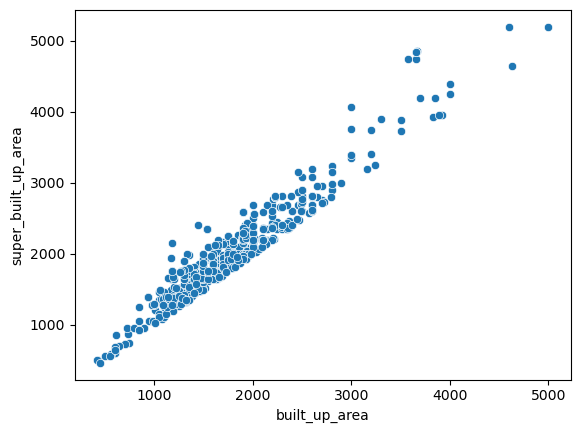

In [260]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'],data=df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

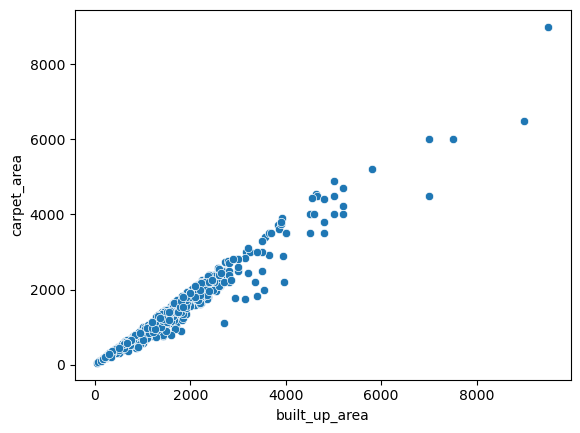

In [261]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'],data=df)

In [262]:
((df['built_up_area'].isnull())&(df['super_built_up_area'].isnull())&(df['carpet_area'].isnull())).sum()

0

In [263]:
all_present_df=df[~((df['built_up_area'].isnull())|(df['super_built_up_area'].isnull())|(df['carpet_area'].isnull()))]

In [264]:
super_to_builtup_ratio=(all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [265]:
carpet_to_builtup_ratio=(all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [266]:
print(super_to_builtup_ratio,carpet_to_builtup_ratio)

1.105263157894737 0.9


In [267]:
sbc_df=df[(df['built_up_area'].isnull())&~(df['super_built_up_area'].isnull())& ~(df['carpet_area'].isnull())]

In [268]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105263157894737)+(sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\anand\AppData\Local\Temp\ipykernel_21276\4263308295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105263157894737)+(sbc_df['carpet_area']/0.9))/2),inplace=True)


In [269]:
df.update(sbc_df)

In [270]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [271]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [272]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New property,5350.0,NaN,NaN,0,1,0,1,1,1,49,1337.500000
6,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,14.0,East,Moderately old,2338.0,NaN,NaN,0,1,0,0,0,0,95,779.333333
7,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,8.0,North-East,Moderately old,1889.0,NaN,NaN,0,1,0,0,0,0,165,695.666667
12,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3,4,3,14.0,North-East,Moderately old,2585.0,NaN,NaN,0,1,0,0,0,0,101,861.666667
15,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3,4,3,16.0,South,Moderately old,1995.0,NaN,NaN,0,1,0,0,0,1,60,682.666667


In [273]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105263157894737),inplace=True)

C:\Users\anand\AppData\Local\Temp\ipykernel_21276\894175848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105263157894737),inplace=True)


In [274]:
df.update(sb_df)

In [275]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [276]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [277]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New property,NaN,NaN,1103.0,1,1,0,0,0,0,38,552.50
11,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2,2,2,3.0,North,Moderately old,NaN,NaN,1100.0,0,0,0,0,0,0,52,550.00
13,flat,emaar mgf emerald floors premier,sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3+,3.0,North-East,Moderately old,NaN,NaN,1975.0,1,1,0,0,0,2,174,493.75
19,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2,2,1,2.0,West,Old Property,NaN,NaN,661.0,0,0,0,0,1,1,49,330.50
25,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4,2,3+,1.0,NaN,Old Property,NaN,NaN,1244.0,0,0,0,0,0,0,0,311.00


In [278]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\anand\AppData\Local\Temp\ipykernel_21276\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [279]:
df.update(c_df)

In [280]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

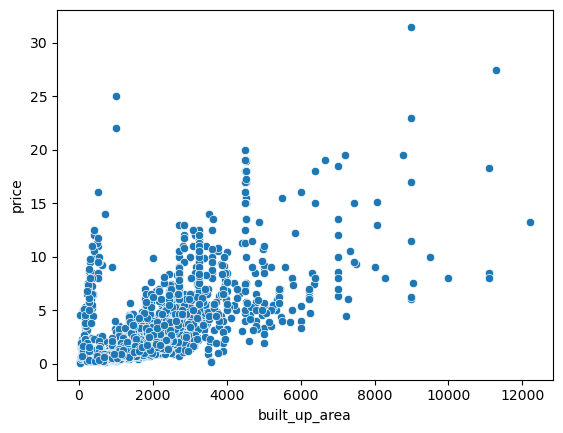

In [281]:
sns.scatterplot(x=df['built_up_area'],y=df['price'],data=df)

In [282]:

anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [283]:
anamoly_df.sample(5)

,price,area,built_up_area
2042,2.55,1557.0,1557.0
227,3.15,1548.0,1548.0
828,2.99,2000.0,1800.0
546,2.75,1557.0,1557.0
799,6.46,3420.0,380.0


In [284]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [285]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

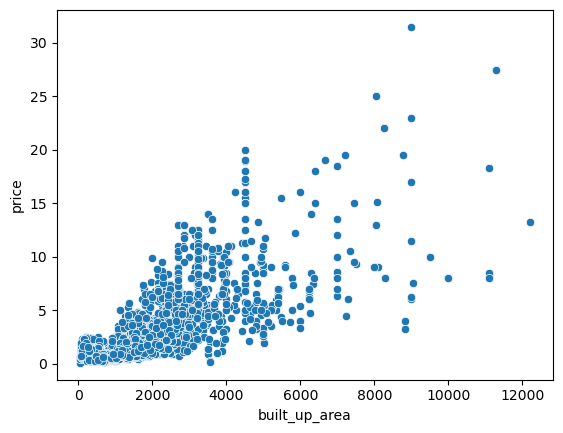

In [286]:
sns.scatterplot(x=df['built_up_area'],y=df['price'],data=df)

In [287]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [288]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,NaN,New property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,NaN,New property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,NaN,New property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,North-West,Moderately old,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,North-East,Moderately old,581.0,0,0,1,0,0,0,159


In [289]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## Floornum

In [290]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
500,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Undefined,585.0,0,0,0,0,0,0,0
767,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1294,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1452,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Moderately old,3240.0,0,0,0,0,0,0,21
1465,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1946,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
2048,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Undefined,3240.0,0,1,1,1,0,0,88
2157,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Undefined,4635.0,0,0,0,0,0,0,0
2271,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Moderately old,5200.0,0,1,1,1,0,1,114
2439,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Undefined,2800.0,0,1,0,1,0,1,130


In [291]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [292]:
df['floorNum'].fillna(2.0,inplace=True)

In [293]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## Facing

<Axes: ylabel='count'>

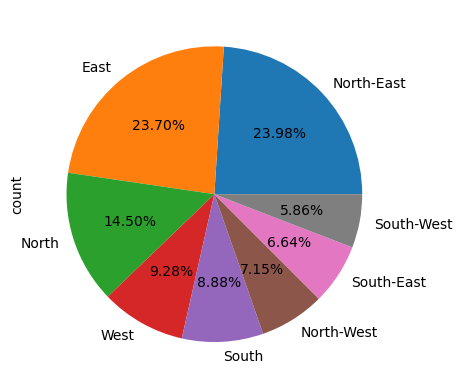

In [294]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [295]:
df.drop(columns=['facing'],inplace=True)

In [296]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1281,flat,ashok vihar phase 2,sector 3 phase 2,0.28,4308.0,2,2,1,3.0,Moderately old,600.0,0,0,0,0,0,0,64
1042,flat,ss the leaf,sector 85,2.15,10925.0,4,5,3+,6.0,Moderately old,2365.0,0,1,0,0,0,0,156
2292,flat,raheja navodaya,sector 92,0.85,4271.0,3,3,3,2.0,Moderately old,1800.0,0,0,0,0,0,0,100
2451,flat,ss the leaf,sector 85,1.98,8257.0,3,4,3,12.0,Moderately old,2399.0,0,0,1,0,0,0,174
3429,flat,corona optus,sector 37c,1.44,7251.0,3,3,3+,8.0,New property,2211.0,0,1,0,0,0,0,37


## society

In [297]:
df.drop(index=[2536],inplace=True)

In [298]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## agePossession

In [299]:
df['agePossession'].value_counts()

agePossession
Moderately old        1605
Undefined              836
New property           557
Old Property           293
Under Construction     263
Name: count, dtype: int64

In [300]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,house,dlf city phase 1,sector 26,4.50,33333.0,3,3,2,2.0,Undefined,1350.0,1,1,0,0,0,0,70
10,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,0,0
22,flat,ansal api celebrity suites,sector 2,0.60,8163.0,1,1,1,5.0,Undefined,665.0,0,0,0,0,0,1,88
24,house,independent,sector 41,7.00,28283.0,7,7,3+,3.0,Undefined,2475.0,1,1,1,1,0,2,151
26,house,independent,sector 4,0.40,8889.0,1,1,0,1.0,Undefined,450.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,flat,deepak minda,manesar,1.20,4528.0,3,3,3+,6.0,Undefined,2944.0,0,1,0,0,0,0,7
3542,flat,bestech park view residency,sector 2,0.55,8462.0,1,1,2,7.0,Undefined,588.0,0,0,0,0,0,0,31
3549,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,4,4,2,1.0,Undefined,480.0,0,0,0,0,0,0,0
3552,flat,ansal api celebrity suites,sector 2,0.60,8163.0,1,1,1,5.0,Undefined,665.0,0,0,0,0,0,1,67


In [301]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [302]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [303]:
df['agePossession'].value_counts()

agePossession
Moderately old        1878
New property           603
Undefined              406
Old Property           383
Under Construction     284
Name: count, dtype: int64

In [304]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [305]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [306]:
df['agePossession'].value_counts()

agePossession
Moderately old        1907
New property           609
Old Property           426
Undefined              328
Under Construction     284
Name: count, dtype: int64

In [307]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [308]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)
df['agePossession'].value_counts()

agePossession
Moderately old        2059
New property           609
Old Property           602
Under Construction     284
Name: count, dtype: int64

In [309]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [ ]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)